In [1]:
#Text classification using RNN and CNN 
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, LSTM, MaxPooling1D, Conv1D, Embedding
from tensorflow.keras.models import Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
#Downloading dataset
!wget https://lazyprogrammer.me/course_files/spam.csv

--2020-06-20 14:24:57--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.80.48, 172.67.213.166, 104.31.81.48, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.80.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv.1’

spam.csv.1          100%[===================>] 491.86K  --.-KB/s    in 0.03s   

2020-06-20 14:24:57 (14.6 MB/s) - ‘spam.csv.1’ saved [503663/503663]



In [3]:
#listing the directory
!ls

sample_data  spam.csv  spam.csv.1


In [4]:
data=pd.read_csv('spam.csv', encoding='ISO-8859-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
#Getting rid of unuseful data
data_new=data[['v1', 'v2']]
new_cols=['class','content']
data_new.columns=new_cols
data_new['class']=data_new['class'].map({'ham':0,'spam':1})
data_new.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,class,content
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
#Getting X and Y

Y=data_new['class'].values
X=data_new['content'].values
print(X.shape)

(5572,)


In [7]:
#splitting into training and testing 
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33)

In [8]:
#converting the sequence into tokens
MAX_VOCAB_SIZE=20000
tokenizer=Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(x_train)
seqence_train=tokenizer.texts_to_sequences(x_train)
seqence_test=tokenizer.texts_to_sequences(x_test)

In [9]:
#Get word ----> Integer_mapping
word2idx=tokenizer.word_index
V=len(word2idx)
print("No. of uniue tokens is : {}".format(V))

No. of uniue tokens is : 7269


In [10]:
#Pad sequences so that we get a NXT matrix
data_train=pad_sequences(seqence_train)
print('shape of data_train sequence:', data_train.shape)

shape of data_train sequence: (3733, 189)


In [11]:
#Get the sequence legnth
T=data_train.shape[1]
print('shape of each sequence is :', T)

shape of each sequence is : 189


In [12]:
#Padding test data
data_test=pad_sequences(seqence_test, maxlen=T)
print('shape of test sequence: ',data_test.shape)

shape of test sequence:  (1839, 189)


In [39]:
#Creating the model using LSTM

D=20   #Choosing embedding dimensionality

M=15 #Hidden layer dimensionality for LSTM

i=Input(shape=(T,))
x=Embedding(V+1,D)(i)
x=LSTM(M,return_sequences=True)(x)
x=GlobalMaxPooling1D()(x)
x=Dense(1,activation='sigmoid')(x)

model=Model(i,x)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
r1=model.fit(data_train,y_train,epochs=10,validation_data=(data_test,y_test))



Epoch 1/10
117/117 [==============================] - 2s 17ms/step - loss: 0.4532 - accuracy: 0.8661 - val_loss: 0.3673 - val_accuracy: 0.8657
Epoch 2/10
117/117 [==============================] - 1s 13ms/step - loss: 0.3344 - accuracy: 0.8661 - val_loss: 0.3085 - val_accuracy: 0.8657
Epoch 3/10
117/117 [==============================] - 2s 13ms/step - loss: 0.2660 - accuracy: 0.8661 - val_loss: 0.2145 - val_accuracy: 0.8657
Epoch 4/10
117/117 [==============================] - 2s 13ms/step - loss: 0.1564 - accuracy: 0.9577 - val_loss: 0.1405 - val_accuracy: 0.9826
Epoch 5/10
117/117 [==============================] - 2s 13ms/step - loss: 0.0956 - accuracy: 0.9871 - val_loss: 0.1036 - val_accuracy: 0.9837
Epoch 6/10
117/117 [==============================] - 2s 13ms/step - loss: 0.0661 - accuracy: 0.9914 - val_loss: 0.0917 - val_accuracy: 0.9848
Epoch 7/10
117/117 [==============================] - 1s 13ms/step - loss: 0.0497 - accuracy: 0.9944 - val_loss: 0.0815 - val_accuracy: 0.9810

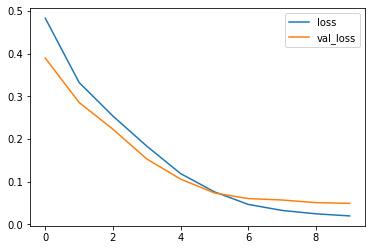

In [14]:
#Plotting loss per iteration curve
plt.plot(r1.history['loss'],label='loss')
plt.plot(r1.history['val_loss'], label='val_loss')
plt.legend()

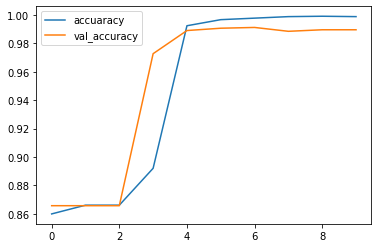

In [15]:
#plotting accuracy per iteration
plt.plot(r1.history['accuracy'], label='accuaracy')
plt.plot(r1.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [49]:
#Creating Model using CNN

D_CNN=20 #Input layer dimension

i2=Input(shape=(T,))
x2=Embedding(V+1,D)(i2)
x2=Conv1D(32,3,activation='relu')(x2)
x2=MaxPooling1D(3)(x2)
x2=Conv1D(64,3,activation='relu')(x2)
x2=MaxPooling1D(3)(x2)
x2=Conv1D(128,3,activation='relu')(x2)
x2=GlobalMaxPooling1D()(x2)
x2=Dense(1,activation='sigmoid')(x2)

model_cnn=Model(i2,x2)
model_cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
r2=model_cnn.fit(data_train,y_train,epochs=10,validation_data=(data_test,y_test))


Epoch 1/10
117/117 [==============================] - 1s 8ms/step - loss: 0.3891 - accuracy: 0.8615 - val_loss: 0.2577 - val_accuracy: 0.8657
Epoch 2/10
117/117 [==============================] - 1s 7ms/step - loss: 0.1200 - accuracy: 0.9545 - val_loss: 0.0586 - val_accuracy: 0.9821
Epoch 3/10
117/117 [==============================] - 1s 7ms/step - loss: 0.0189 - accuracy: 0.9941 - val_loss: 0.0505 - val_accuracy: 0.9880
Epoch 4/10
117/117 [==============================] - 1s 7ms/step - loss: 0.0042 - accuracy: 0.9995 - val_loss: 0.0475 - val_accuracy: 0.9913
Epoch 5/10
117/117 [==============================] - 1s 7ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0491 - val_accuracy: 0.9908
Epoch 6/10
117/117 [==============================] - 1s 7ms/step - loss: 6.2126e-04 - accuracy: 1.0000 - val_loss: 0.0500 - val_accuracy: 0.9924
Epoch 7/10
117/117 [==============================] - 1s 7ms/step - loss: 3.4367e-04 - accuracy: 1.0000 - val_loss: 0.0539 - val_accuracy: 0.990

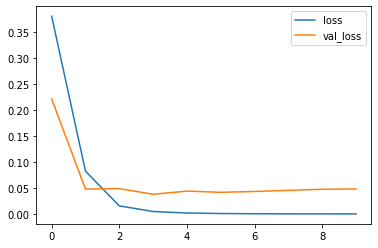

In [48]:
#Plotting loss per iteration for CNN Model

plt.plot(r2.history['loss'], label='loss')
plt.plot(r2.history['val_loss'], label='val_loss')
plt.legend()

In [125]:
y_predict=model_cnn.predict(data_test)
y_predict=y_predict.flatten().round()
y_predict.sum()

236.0

In [126]:
#misclassified IDX

misclassified_idx=np.where(y_predict!=y_test)[0]
#i=np.random.choice(misclassified_idx)
#print('label for', (x_test[i])+' is : {}'.format(y_test[i])+' but predicted is : {}'.format(y_predict[i]))
#print(i)
misclassified_idx.shape

(15,)

In [127]:
#Printing confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
cm

array([[1590,    2],
       [  13,  234]])

In [167]:
test_sentence=[]
test_sentence.append("text your ID 987799 and get a chance to win free pass hurry up")
feed=pad_sequences(tokenizer.texts_to_sequences(test_sentence),maxlen=T)
prediction=model.predict(feed).round()
prediction



array([[1.]], dtype=float32)

In [154]:
X

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)